In [24]:
# imports 
import requests
import json
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# configs
url_endpoint = 'https://covid19-api.vost.pt/Requests/get_full_dataset'

In [4]:
response = requests.get(url_endpoint)

all_data = pandas.read_json(json.dumps(response.json()))

In [73]:
all_data.sort_values( by = 'data' , ascending = False).head()

# subset
relevant_cols = all_data[
    ['data','confirmados', 'ativos', 'internados_enfermaria']
].rename(
    columns={'internados_enfermaria':'hospitalized','confirmados':'confirmed', 'ativos':'active'}
)

In [74]:
relevant_cols['date'] = pandas.to_datetime(relevant_cols.data , dayfirst = True)


relevant_cols = relevant_cols.sort_values(by = 'date', ascending = True).drop(columns=['data'])

In [34]:
relevant_cols['confirmed_ma'] = np.round(relevant_cols.iloc[:,0].rolling(window=15).mean(),1)

relevant_cols['hospitalized_ma'] = np.round(relevant_cols.iloc[:,2].rolling(window=15).mean(),1)

relevant_cols

confirmed   active  hospitalized       date  confirmed_ma  \
0            0      NaN           NaN 2020-02-26           NaN   
1            0      NaN           NaN 2020-02-27           NaN   
2            0      NaN           NaN 2020-02-28           NaN   
3            0      NaN           NaN 2020-02-29           NaN   
4            0      NaN           NaN 2020-03-01           NaN   
..         ...      ...           ...        ...           ...   
258     187237  77338.0        2360.0 2020-11-10      154222.2   
259     192172  78716.0        2394.0 2020-11-11      158738.2   
260     198011  81141.0        2411.0 2020-11-12      163379.5   
261     204664  84032.0        2411.0 2020-11-13      168182.7   
262     211266  85444.0        2385.0 2020-11-14      173115.6   

     hospitalized_ma  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
..               ...  
258           1914.3  
259           1974.3  
260           2032.9  
261           2089.3  
262           2138.1  

[263 rows x 6 columns]

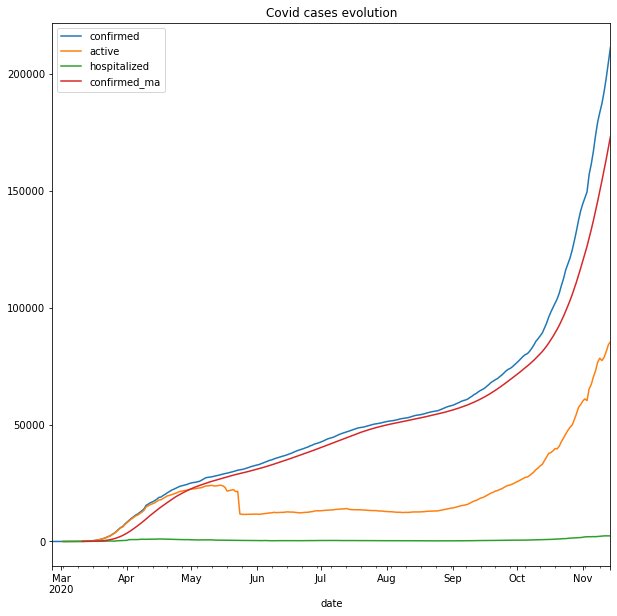

In [33]:
relevant_cols.plot( 
    x = 'date', 
    figsize=(10,10),
    title = 'Covid cases evolution'
)

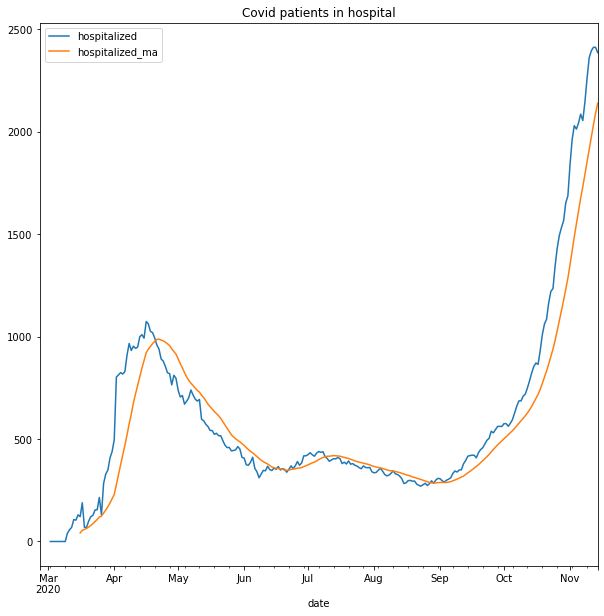

In [36]:
internados = relevant_cols[['date','hospitalized', 'hospitalized_ma']]

internados.plot( 
    x = 'date', 
    figsize=(10,10),
    title = 'Covid patients in hospital'
)

In [83]:
geo_data = all_data[['data','confirmados', 'confirmados_arsnorte'
                     , 'confirmados_arscentro', 'confirmados_arslvt'
                     , 'confirmados_arsalentejo','confirmados_arsalgarve'
                     , 'confirmados_madeira','confirmados_acores'
                    ]]

for col in geo_data.columns : 
    if col not in ['data' , 'confirmados'] : 
        geo_data['perc_' + col.replace('confirmados_','')] = geo_data[col].div(geo_data['confirmados'], axis=0)
        geo_data = geo_data.drop(columns=[col])
    
geo_data['date'] = pandas.to_datetime(geo_data.data , dayfirst = True)    
geo_data = geo_data.drop(columns=['confirmados', 'data'])     

<ipython-input-83-89f337025f08>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_data['perc_' + col.replace('confirmados_','')] = geo_data[col].div(geo_data['confirmados'], axis=0)


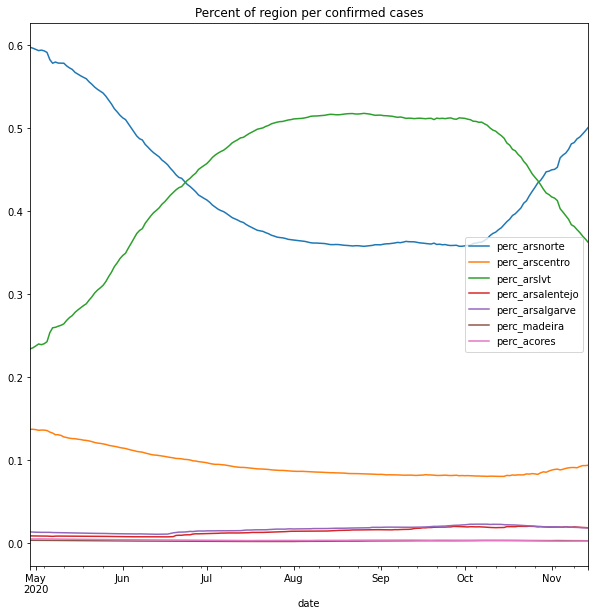

In [85]:
geo_data_plot = geo_data.sort_values('date', ascending= False).head(200)       

geo_data_plot.plot( 
    x = 'date', 
    figsize=(10,10),
    title = 'Percent of region per confirmed cases'
)